In [385]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FArea_bajo_la_curva_ROC import AUC
from FFunción_envolvente_rms import envolvente_rms
import scipy.io as sio 
from scipy.fftpack import fft, fftfreq
from random import gauss
import bioread

- - -

    1. Sea 𝑋𝑡 un paseo aleatorio definido por 𝑋𝑡 = ∑ 𝑎𝑗 (𝑗=1 -> 𝑡) ; donde 𝑎𝑗~𝑖𝑖𝑑 𝑁(0, 𝜎²). 
    (a) Genera 6 trayectorias de tamaño 𝑡 = 300, tomando 𝜎²= 1. 
    (b) Representa gráficamente en un mismo gráfico las 6 trayectorias.

### Apartado A

In [320]:
t1 = np.arange (0,300)
a1 = np.zeros (len(t1))
x1 = np.zeros ((len(t1),6))

#Para definir x
for j in range (len(t1)):
    a1[j] = gauss (0,1)
    x1[j] = np.sum (a1[1:j])

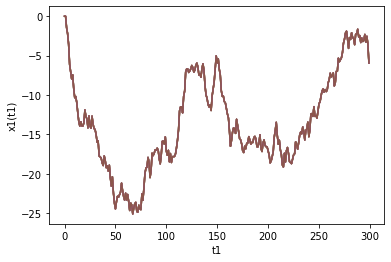

In [321]:
plt.plot (t1,x1)
plt.ylabel ("x1(t1)")
plt.xlabel ("t1")
plt.show()

### Apartado B

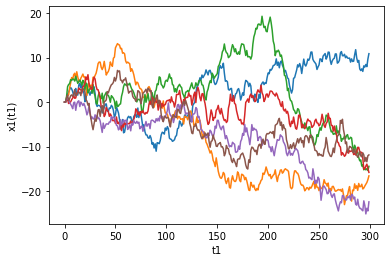

In [322]:
for i in range (6):
    for j in range (len(t1)):
        a1[j] = gauss (0,1)
        x1[j,i] = np.sum (a1[1:j])

        
plt.plot (t1,x1)
plt.ylabel ("x1(t1)")
plt.xlabel ("t1")
plt.show()

- - -

    2. Supongamos que un proceso estocástico es generado por el modelo: 𝑦𝑡 = 𝑎 cos(λ 𝑡) + 𝑏 sin(λ 𝑡), donde λ es fijo y a y b son variables aleatorias con media cero. Bajo qué condiciones {𝑦𝑡} es estacionario?

### Definición: Un PE es estacionario en sentido amplio sii:

## μ(t) = E [X(t)] = μ = cte

## Rx (t1,t2) = Rx (t1 - t2) = Rx (τ) = E [X(t) X (t+τ)]

Rx: autocorrelación de la señal

    𝑦𝑡 = 𝑎 cos(λ 𝑡) + 𝑏 sin(λ 𝑡)

    Defino λ=1

    a y b son variables aleatorias con media cero

    y(t,a,b) = a cos (λ.t) + b sin (λ.t)


    CONDICIÓN 1:

    E [y(a,b,t)] = E [𝑎 cos(λ 𝑡) + 𝑏 sin(λ 𝑡)]

                 = E [𝑎 cos(λ 𝑡)] + E [𝑏 sin(λ 𝑡)]
                 = cos(λ 𝑡) E[a] + sin(λ 𝑡) E[b]
                 = cos(λ 𝑡) . 0  + sin(λ 𝑡) . 0
                 = 0 cte.


    CONDICIÓN 2:

    E [y(a,b,t) * y(a,b,t+τ)] = E [ 𝑎 cos(λ 𝑡) + 𝑏 sin(λ 𝑡) * 𝑎 cos(λ 𝑡+τ) + 𝑏 sin(λ 𝑡+τ) ]

    # E [a2] = var (a) ; E [b2] = var (b) ; E [a*b] = cov (a,b)

    # Utilizando propiedades trigonométricas

    # E [y(a,b,t) * y(a,b,t+τ)] = cos (λ 𝑡) * (var (a) + var (b))/2 + cos (λ (τ + 2t)) * (var (a) + var (b))/2 + sen (λ (τ + 2t)) + cov (a,b)

    1) var (a) - var (b)
    2) cov (a,b) = 0

- - -

    3. Encuentra el espectro del Ruido blanco.

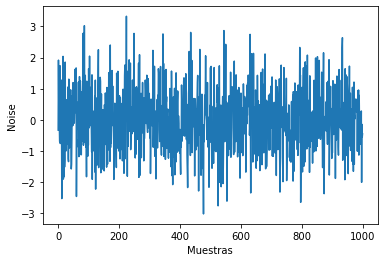

In [323]:
media = 0
sigma = 1
N = 1000

noise = np.random.normal (media,sigma,N)

plt.plot (noise)
plt.xlabel ("Muestras")
plt.ylabel ("Noise")
plt.show()

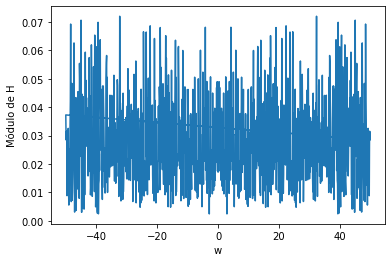

In [324]:
Fs = 100
H = fft (noise) / len (noise) #lo normalizamos
w = fftfreq (len(noise),1/Fs)

plt.plot (w,abs(H))
plt.xlabel ("w")
plt.ylabel ("Módulo de H")
plt.show()

- - -

    4. Encuentra el espectro de una señal sinusoidal de amplitud unitaria inmersa en ruido gaussiano con media nula y desvío estándar 0.25.

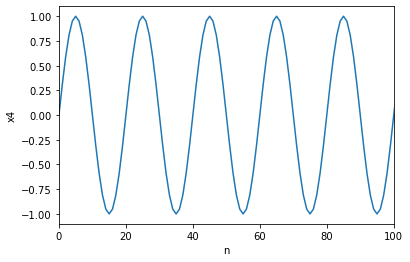

In [325]:
A = 1
med = 0
sig = 0.25
muestras = 500
n = np.arange (0,muestras)

x4 = A*np.sin (2*np.pi*1/20*n)


plt.plot (n,x4)
plt.xlabel ("n")
plt.ylabel ("x4")
plt.xlim (0,100)
plt.show()

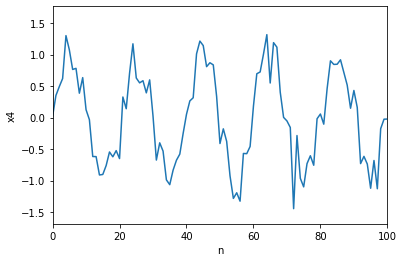

In [326]:
noise4 = np.random.normal (med,sig,muestras)

X4 = x4+noise4

plt.plot (n,X4)
plt.xlabel ("n")
plt.ylabel ("x4")
plt.xlim (0,100)
plt.show()

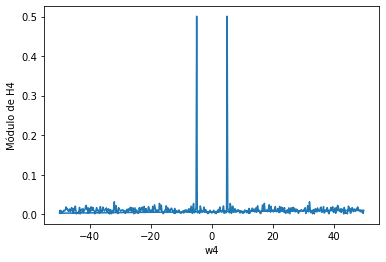

In [327]:
Fs4 = 100
H4 = fft (X4) / len (X4) #lo normalizamos
w4 = fftfreq (len(X4),1/Fs4)

plt.plot (w4,abs(H4))
plt.xlabel ("w4")
plt.ylabel ("Módulo de H4")
plt.show()

- - -

    5. Utilizando el método presentado en la clase teórica y empleando como datos la señal electromiográfica contenida en el archivo vel3-P21.

    a. Elimina las regiones sin actividad eléctrica.

    b. Segmenta la señal tomando segmentos temporales de diferentes cantidades de muestra: por ejemplo desde 20 muestras hasta 2000 en pasos de 20.

    c. Para cada longitud de segmento construye una matriz de datos de dimensión (nxm) con n = longitud de los segmentos y m = máximo número de columnas de modo que todas las matrices tengan la misma cantidad de columnas. ¿Por qué es importante hacer esto? Luego elijo aleatoriamente 10 filas al azar y construye con ellas las pdf y la pdf promedio de las 10.

    d. Para cada longitud de segmento elige al azar uno de los 10 instantes de tiempo y determina cuan bueno es el ajuste de la pdf obtenida con el kernel Gaussiano, comparándolo con ajustes de distribuciones continuas paramétricas conocidas (normal, de cauchy, logística, gamma, etc.). Para ello emplea como criterio de comparación el valor de SSE (suma de los cuadrados de los desvíos). Construye una tabla con el valor de SSE en sentido creciente de todos los ajustes realizados, agregando el valor óptimo de los parámetros de cada una de las distribuciones continuas empleadas en el análisis.
    
    e. Explica conceptualmente y calcula cómo determinas para que longitudes de segmento se puede considerar que el proceso estocástico es estacionario?.
    Investiga y emplea al menos tres formas de comparar las pdf.

In [328]:
S5 = bioread.read_file ("V3-P2.acq")

In [329]:
#Para indicarme todos los atributos que tiene:
dir (S5)

['_Datafile__build_channels',
 '_Datafile__named_channels',
 '_Datafile__set_channel_time_indexes',
 '_Datafile__time_index',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'channel_dtype_headers',
 'channel_headers',
 'channel_order_map',
 'channels',
 'data_length',
 'earliest_marker_created_at',
 'event_markers',
 'foreign_header',
 'graph_header',
 'is_compressed',
 'journal',
 'journal_header',
 'marker_header',
 'marker_item_headers',
 'name',
 'named_channels',
 'samples_per_second',
 'time_index']

In [330]:
S5.channels

[Channel EMG (30 - 500 Hz) - DM: 87679 samples, 2000.0 samples/sec, loaded: True,
 Channel EMG (30 - 500 Hz) - DA: 87679 samples, 2000.0 samples/sec, loaded: True,
 Channel EMG (30 - 500 Hz) - DP: 87679 samples, 2000.0 samples/sec, loaded: True,
 Channel EMG (30 - 500 Hz) - TR: 87679 samples, 2000.0 samples/sec, loaded: True]

In [331]:
87679/20

4383.95

In [332]:
#Frecuencia de muestreo
fs5 = S5.samples_per_second 
fs5

2000.0

In [333]:
#Vector del tiempo
t5 = S5.time_index.T
t5

array([0.00000000e+00, 5.00005703e-04, 1.00001141e-03, ...,
       4.38385000e+01, 4.38390000e+01, 4.38395000e+01])

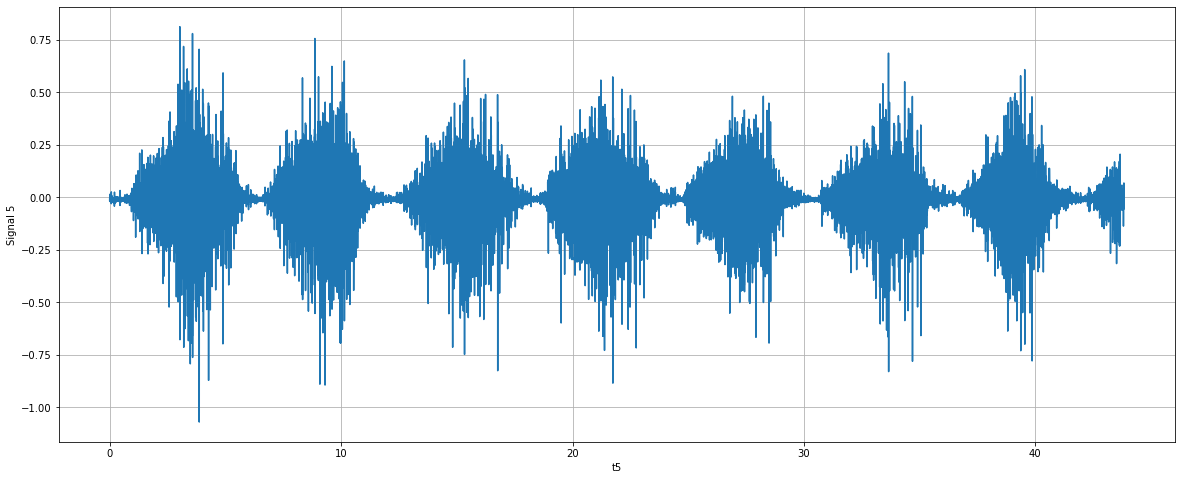

In [334]:
signal5 = S5.channels [3].data

plt.figure (figsize =(20,8))
plt.plot (t5,signal5)
plt.xlabel ("t5")
plt.ylabel ("Signal 5")
plt.grid (True)
plt.show ()

### Apartado A

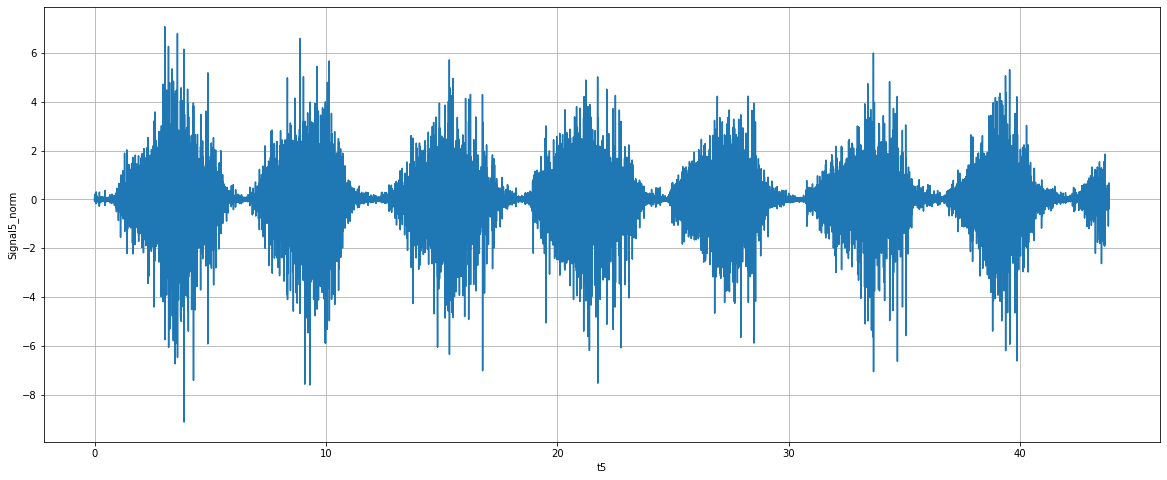

In [335]:
signal5_norm = (signal5 - np.mean (signal5)) / (np.std (signal5))


plt.figure (figsize =(20,8))
plt.plot (t5,signal5_norm)
plt.xlabel ("t5")
plt.ylabel ("Signal5_norm")
plt.grid (True)
plt.show ()

Realizamos esto para ver si la función o la señal es estacionaria.

In [336]:
def EliminaConUmbral(signal,umbral,window_size):
    h = umbral;  y = envolvente_rms(signal,window_size);
    ind = np.where(y > h)[0]; dig = np.zeros(len(signal));
    dig[ind] = 0.25; dif = np.diff(dig); 
    ini = np.where(dif == 0.25)[0]; fin = np.where(dif == -0.25)[0]
    i = 0
    while ini[0] > fin[i]:
        i = i + 1
    if i > 0:
        fin[0:len(fin)-1] = fin[i:len(fin)]
    p = np.min([len(ini),len(fin)])
    k = 0
    new_signal = np.empty(0)
    indices = np.empty(0)
    for i in np.arange(p):
        d = fin[i] - ini[i]
        if d > 100:
            new_signal = np.append(new_signal, signal[ini[i]:fin[i]+1])
            indices = np.append(indices, np.array([ini[i],fin[i]]))
            k = k + 1
    return k, indices, new_signal

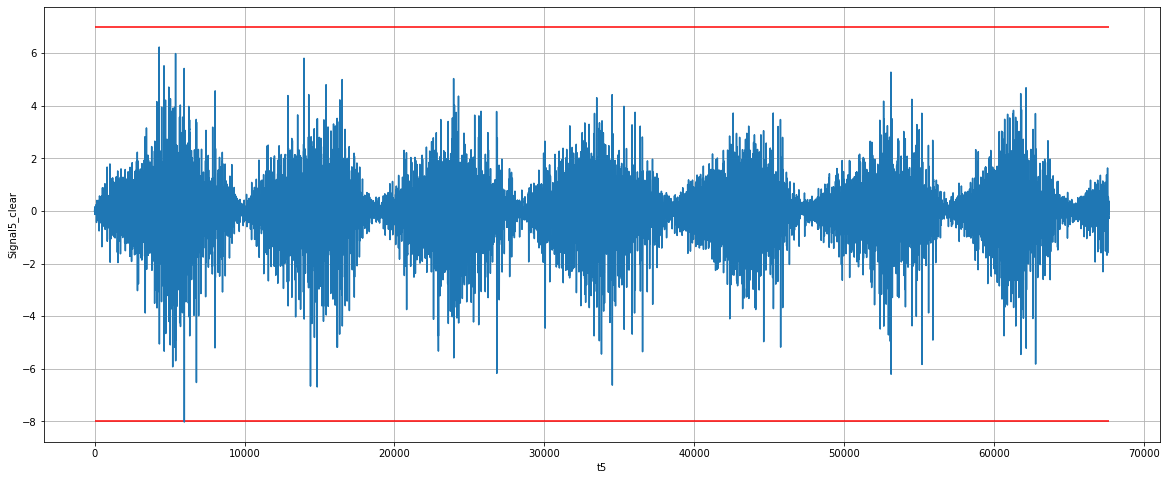

In [337]:
#Otra forma de hacerlo

z = EliminaConUmbral (signal5,0.02,150)
s = z[2]

signal5_norm = (s - np.mean (s)) / (np.std (s))
ns5 = np.arange (len(s))


plt.figure (figsize =(20,8))
ylh = np.array([-8,7])
plt.plot (ns5,signal5_norm)
plt.hlines(ylh,0,len(signal5_norm),'r')
plt.xlabel ("t5")
plt.ylabel ("Signal5_clear")
plt.grid (True)
plt.show ()

In [338]:
len (signal5_norm) / 2000

33.828

### Apartado B

In [339]:
n = np.arange(20,2020,20)
seg = np.round(n) #vector de longitudes de segmento
nseg = len(seg)
seg, nseg

(array([  20,   40,   60,   80,  100,  120,  140,  160,  180,  200,  220,
         240,  260,  280,  300,  320,  340,  360,  380,  400,  420,  440,
         460,  480,  500,  520,  540,  560,  580,  600,  620,  640,  660,
         680,  700,  720,  740,  760,  780,  800,  820,  840,  860,  880,
         900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080, 1100,
        1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320,
        1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540,
        1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760,
        1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980,
        2000]),
 100)

### Apartado C

In [340]:
from FEstimaciondeunafdp_new1 import pdf_new1
import datetime

In [341]:
tini = datetime.datetime.now() #Tiempo inicial.

bigp = np.empty(0) #Matriz vacía en la que vamos a agregar los datos con lo que vamos a construir los pdf.
#Por cada longitud de segmento tenemos una matriz y cada una de ellas, vamos a elegir 10 filas.

bigY = np.empty(0,dtype=float)

dat = signal5_norm

Ndat = len(dat)

x0, xf, Np = -8, 7, 24000
d = (xf-x0)/Np #Vector de paso.
x = x0 + d*np.arange(Np)


for i in np.arange(nseg): #Este lazo recorre las diferentes longitudes de segmento.
    datos = np.empty((int(seg[i]),0)) #Genero una matriz donde guardaré los datos.
    m = Ndat//seg[i] #Cuántas columnas tendrá para cada caso, division: // = N° entero
    aux = np.reshape(dat[0:seg[i]*m],(int(seg[i]),int(m)),order= 'F')
    datos = np.append(datos, aux, axis=1) #Datos para cada longitud de segmento.
    #Ya inserte los datos para cada longitud de segmento, que se van agregando en forma de columnas.
    #Debo construir las fdp con la misma cantidad de datos.
    #Eleccion aleatoria. Hemos dicho q ibamos a tomar el peor de los casos: 764 columnas .
    mi = np.random.choice(int(m),33,replace=False) #Elige aleatoriamente 818 numeros con las columnas que se va a quedar. Esto ya que dividimos en 100 segmentos.
    #Replace=false para que no se repitan los datos.
    datos = datos[:,mi] #Nos quedamos con todas las filas y las columnas mi.
    #Hemos creado de nuevo la matriz pero más pequeña y todas las pdf se construiran con la misma cantidad de datos.
    r = np.random.choice(seg[i],10,replace=False) #Elijo las 10 filas aleatoriamente.
    p = datos[r,:]
    bigp = np.append(bigp, p)
    
    y1 = pdf_new1(p[0,:],x0,xf,Np,1); y2 = pdf_new1(p[1,:],x0,xf,Np,1) #1: nombre de la matriz, 2: lo que le agrego.
    y3 = pdf_new1(p[2,:],x0,xf,Np,1); y4 = pdf_new1(p[3,:],x0,xf,Np,1) #1:los datos[fila,columnas],desde donde,hasta donde, cantidad de datos, valor que ajusta el ancho de banda.
    y5 = pdf_new1(p[4,:],x0,xf,Np,1); y6 = pdf_new1(p[5,:],x0,xf,Np,1)
    y7 = pdf_new1(p[6,:],x0,xf,Np,1); y8 = pdf_new1(p[7,:],x0,xf,Np,1)
    y9 = pdf_new1(p[8,:],x0,xf,Np,1); y10 = pdf_new1(p[9,:],x0,xf,Np,1)

    #MATRIZ P DESDE DONDE SE CONSTRUYEN LAS FUNCIONES 
    #MATRIZ Y QUE JUNTA LAS FUNCIONES CONSTRUIDAS

    Y = np.hstack((y1,y2,y3,y4,y5,y6,y7,y8,y9,y10)) #Acumulo horizontalmente
    bigY = np.append(bigY, Y)

tend = datetime.datetime.now()    

In [342]:
y1.shape

(24000,)

### Apartado D

In [343]:
y1.shape, Y.shape, np.shape(bigY), Np * 10 * nseg,nseg

((24000,), (240000,), (24000000,), 24000000, 100)

In [344]:
bigp.shape , 10*33*nseg

((33000,), 33000)

In [345]:
Y1 = np.reshape(bigY,(Np, 10 * nseg), order='F')

In [346]:
Y1.shape #contiene de todas las longitudes de segmento

(24000, 1000)

In [347]:
Y_s = np.reshape(Y,(Np, 10), order='F')
Y_s.shape #contiene de la última

(24000, 10)

In [348]:
np.where (seg == 1980) #longitud de segmento

(array([98]),)

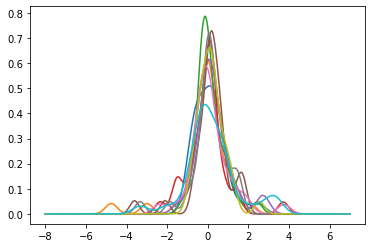

In [349]:
plt.plot(x,Y_s)
plt.show()

In [350]:
from scipy.stats import norm, cauchy, gamma, logistic
from fitter import Fitter

In [351]:
P1 = np.reshape(bigp,(10*nseg, 33))

In [352]:
P1.shape

(1000, 33)

In [353]:
p[0,0:10],P1[990,0:10] #verifico que el reshape funcioma.

(array([-0.42413996, -0.63766562, -0.00633218,  0.43458444,  0.21181524,
        -0.35019168, -0.07473434,  2.54673218, -0.76430205, -0.76430205]),
 array([-0.42413996, -0.63766562, -0.00633218,  0.43458444,  0.21181524,
        -0.35019168, -0.07473434,  2.54673218, -0.76430205, -0.76430205]))

In [354]:
P1.shape

(1000, 33)

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 74.01it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
logistic,6.040564,502.191324,-49.041320,inf,0.070423,0.992829
cauchy,6.148397,513.354287,-48.457420,inf,0.075871,0.983747
norm,6.195001,486.584212,-48.208228,inf,0.085342,0.953092
gamma,6.225393,487.191718,-44.550222,inf,0.099138,0.870342


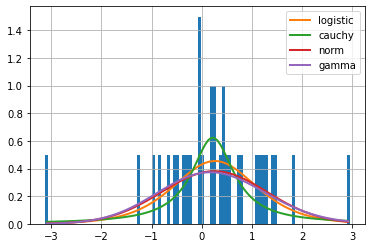

In [436]:
distribuciones = ['norm','cauchy','gamma','logistic']
fitter = Fitter(P1[0,:],distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=4,plot=True)

In [437]:
fitter.fitted_param['cauchy'], fitter.fitted_param['logistic'], fitter.fitted_param['norm'] , fitter.fitted_param['gamma']

((0.2184034869651283, 0.5102653047015289),
 (0.26168215965314096, 0.5503118783101923),
 (0.24934959773673349, 1.0476686365636516),
 (298.53080180004616, -18.266230682142627, 0.061967019969946566))

In [438]:
x_cauchy = x
y_cauchy = cauchy.pdf(x_cauchy, 0.21707731849738932, 0.3098483521814036)

x_logistic = x
y_logistic = logistic.pdf(x_logistic, 0.22735578969302186, 0.3877189138909765)

x_norm = x
y_norm = norm.pdf(x_norm, 0.19865020886634122, 0.7996211006832076)

x_gamma = x
y_gamma = gamma.pdf(x_gamma, 390.6687879026996, -16.32339463505012, 0.04223421064120035)

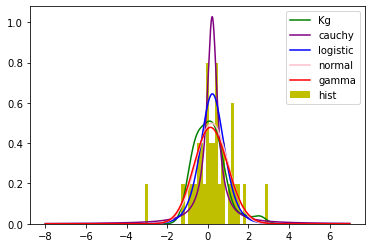

In [444]:
plt.plot(x,y1,'g')
plt.plot(x_cauchy,y_cauchy,'purple')
plt.plot(x_logistic,y_logistic,'blue')
plt.plot(x_norm,y_norm,'pink')
plt.plot(x_gamma,y_gamma,'red')
plt.hist(P1[0,:],bins=40,density=True,color='y')
plt.legend(('Kg','cauchy',"logistic","normal","gamma",'hist'))
plt.show()

In [445]:
from FSum_of_square_error_SSE import sse

In [446]:
H = np.histogram(P1[2,:],bins=40,density=True)
yH = H[0]; xH = H[1][:-1]

In [447]:
sse_kG = sse(xH,yH,x,y3)
sse_kG

1.1041750725827288

In [448]:
sse_cauchy = sse(xH,yH,x_cauchy,y_cauchy)
sse_cauchy

1.2212775312933497

In [449]:
sse_logistic = sse(xH,yH,x_logistic,y_logistic)
sse_logistic

1.0878265551287292

In [450]:
sse_norm = sse(xH,yH,x_norm,y_norm)
sse_norm

1.1710238101645103

In [451]:
sse_gamma = sse(xH,yH,x_gamma,y_gamma)
sse_gamma

1.1657347074367364

    DISTRIBUCIONES              SSE                                       PARÁMETROS
    KG                          0.13801951957188385           
    CAUCHY                      0.2487778993573892                      0.07841262924553759, 0.38358391936382874
    LOGISTIC                    0.2902483689889594                      -0.004070364466893826, 0.5097867368375344
    NORMAL                      0.5770200447056794                      -0.147086010375234, 1.2249058900509504
    GAMMA                       0.6497824539216882                      432.0597722889545, -28.112527114618388, 0.06467504534854018


### Apartado E

    1) Método del índice de solapamiento

In [388]:
from FOverlapping_Index import area

In [389]:
2000/fs5

1.0

In [390]:
Area = np.empty(0)

for k in np.arange (0,50,10):
    for i in range(0,10):
        for j in range(i+1,10):
            Area = np.append(Area, area(x,Y1[:,k+i],Y1[:,k+j]))

In [391]:
Area.shape,5*45

((225,), 225)

In [392]:
A = np.reshape (Area,(45,5),order = "F")

In [393]:
A[:,0], Area [0:45]

(array([0.79602992, 0.85902861, 0.81299383, 0.86011521, 0.91313517,
        0.83586016, 0.92116141, 0.80532961, 0.82776357, 0.89676839,
        0.81227759, 0.80705895, 0.84005693, 0.8003574 , 0.82121646,
        0.85605984, 0.87681591, 0.8341989 , 0.84124396, 0.89079005,
        0.82377972, 0.86855689, 0.85957143, 0.89450801, 0.80109321,
        0.82458962, 0.7722289 , 0.81373892, 0.93390923, 0.83884474,
        0.8825725 , 0.913535  , 0.92463492, 0.79451812, 0.86668062,
        0.83696096, 0.92333457, 0.83530732, 0.87831926, 0.86831737,
        0.78316119, 0.83577425, 0.82134386, 0.87934257, 0.87610279]),
 array([0.79602992, 0.85902861, 0.81299383, 0.86011521, 0.91313517,
        0.83586016, 0.92116141, 0.80532961, 0.82776357, 0.89676839,
        0.81227759, 0.80705895, 0.84005693, 0.8003574 , 0.82121646,
        0.85605984, 0.87681591, 0.8341989 , 0.84124396, 0.89079005,
        0.82377972, 0.86855689, 0.85957143, 0.89450801, 0.80109321,
        0.82458962, 0.7722289 , 0.81373892, 0.

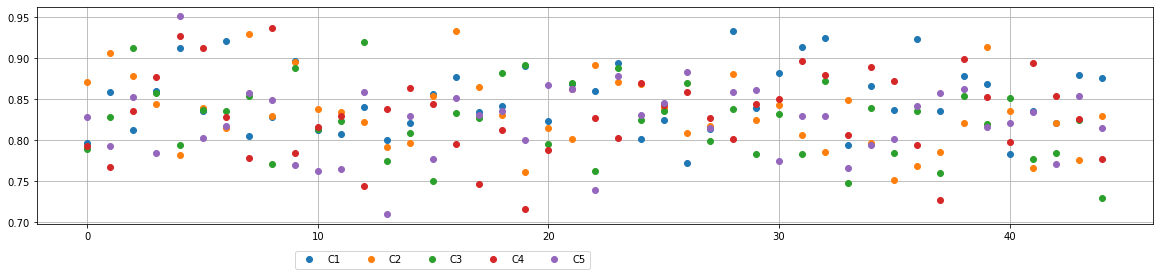

In [394]:
plt.figure(figsize=(20,4))
plt.plot(A,'o')
plt.legend (("C1","C2","C3","C4","C5"),loc=0,ncol=5,bbox_to_anchor=(0.5,-0.1))
plt.grid (True)
plt.show()

### Podemos observar con el gráfico que la dispersión de los puntos es independiente de la longitud de segmento.

In [373]:
DE = np.zeros (5)
for i in range (5):
    DE[i] = np.std (A[:,i])

print (DE) #Dispersión de los datos

[0.04121101 0.04437125 0.04489836 0.05086372 0.04338676]


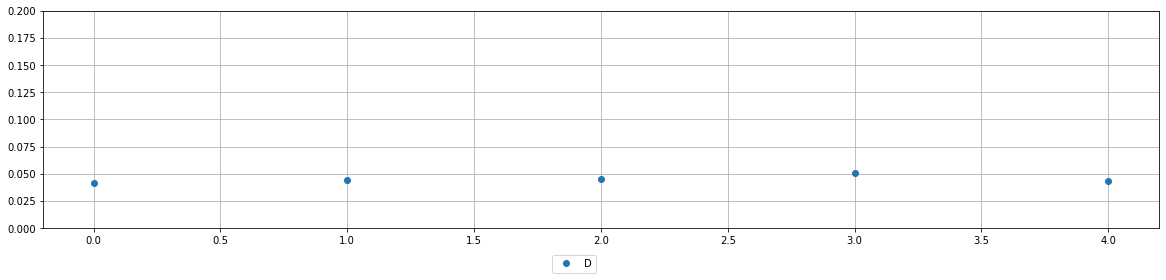

In [374]:
plt.figure(figsize=(20,4))
plt.plot(DE,'o')
plt.legend (("DE"),loc=0,ncol=5,bbox_to_anchor=(0.5,-0.1))
plt.grid (True)
plt.ylim (0,0.2)
plt.show()

- - -

    2) Método de las Curvas ROC

In [395]:
from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1 import cdf 
from scipy.stats import wasserstein_distance

In [396]:
#Función de densidad acumulada
cdf1 = cdf(x,Y_s[:,0]) 
cdf2 = cdf(x,Y_s[:,1])

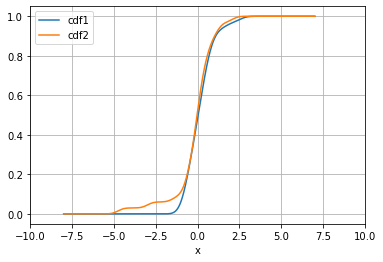

In [398]:
plt.plot(x,cdf1)
plt.plot(x,cdf2)
plt.xlabel ("x")
plt.grid (True)
plt.legend (("cdf1","cdf2"))
plt.xlim (-10,10)
plt.show()

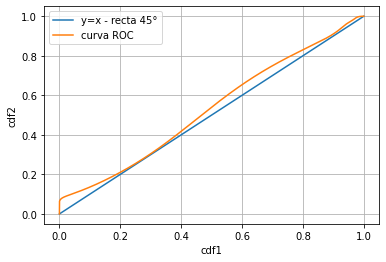

In [401]:
#CURVAS ROC

plt.plot(cdf1,cdf1) #línea de 45 grados
plt.plot(cdf1,cdf2)
plt.xlabel ("cdf1")
plt.ylabel ("cdf2")
plt.grid (True)
plt.legend (("y=x - recta 45°","curva ROC"))
plt.show()

Cuánto más se parezcan cdf1 y cdf2, más próxima a 1/2 será el área bajo la curva ROC.

In [412]:
from FAreabajolacurvaROC import AUC

AUC (cdf1,cdf2)

112.03085080186591

In [413]:
CDF = np.zeros ((Np,10))
for i in range (10):
    CDF [:,i] = cdf (x,Y_s[:,i])

#Es la suma punto a punto desde -11 hasta 5 de los valores de la pdf.

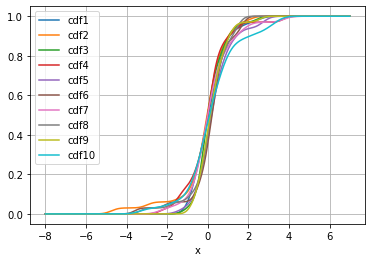

In [415]:
plt.plot(x,CDF)
plt.xlabel ("x")
plt.grid (True)
plt.legend (("cdf1","cdf2","cdf3","cdf4","cdf5","cdf6","cdf7","cdf8","cdf9","cdf10"))
plt.show()

Text(0, 0.5, 'j-ésima cdf')

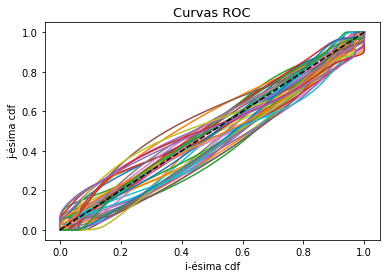

In [422]:
#CURVAS ROC

for i in range (0,10):
    for j in range (i+1,10):
        plt.plot (CDF [:,i],CDF [:,j])
plt.plot (cdf1,cdf1,"--",color="black")
plt.title ("Curvas ROC", fontsize = 13)
plt.xlabel ("i-ésima cdf")
plt.ylabel ("j-ésima cdf")

La CDF es la suma punto a punto desde (-inf) a (inf) de los valores de pdf.

Cuánto más parecidas sean, más similar a la recta de 45°.

In [425]:
Area_AUC = np.empty(0)

for i in range(0,10):
    for j in range(i+1,10):
        Area_AUC = np.append(Area, AUC(CDF[:,i],CDF[:,j]))

Area_AUC.shape

(226,)

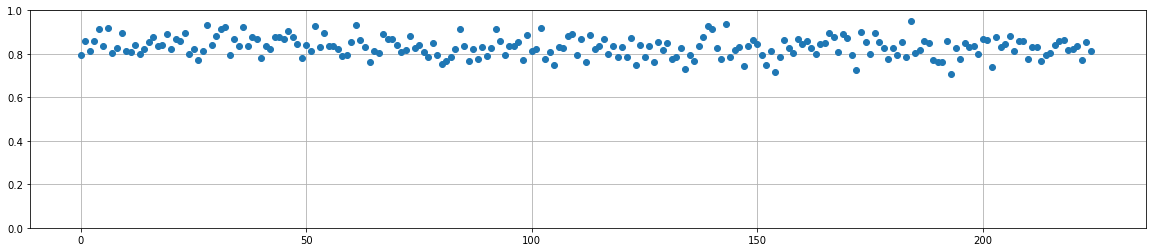

In [427]:
plt.figure(figsize=(20,4))
plt.plot(Area_AUC,'o')
plt.grid (True)
plt.ylim (0,1)
plt.show()

Mientras más parecido entre ellas sean, el valor estará más cercano a 0.5.

- - -

    3) Método de la distancia de Wasserstein (Distancia de movimiento de tierra)

In [428]:
from scipy.stats import wasserstein_distance

In [430]:
wasserstein_distance (Y_s[:,0],Y_s[:,1],CDF[:,0],CDF[:,1])

0.01199843225919299

In [431]:
W_distance = np.empty(0)

for i in range(0,10):
    for j in range(i+1,10):
        W_distance = np.append(W_distance, wasserstein_distance (Y_s[:,i],Y_s[:,j],CDF[:,i],CDF[:,j]))

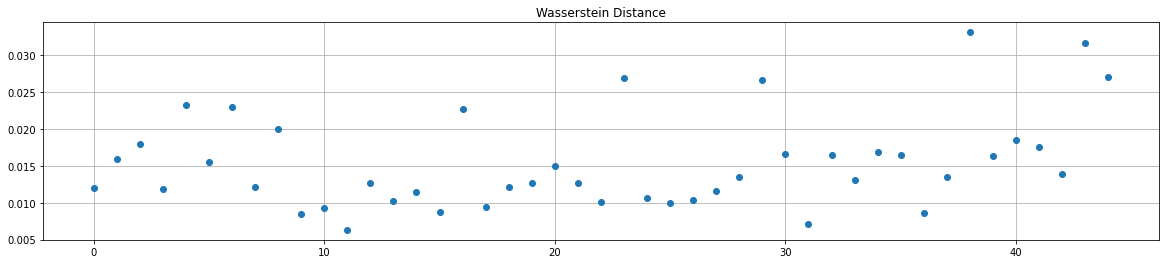

In [433]:
plt.figure(figsize=(20,4))
plt.plot(W_distance,'o')
plt.title ("Wasserstein Distance")
plt.grid (True)
plt.show()

#### Entre sí misma:

In [435]:
wasserstein_distance (Y_s[:,0],Y_s[:,0],CDF[:,0],CDF[:,0])

#No hay que mover absolutamente nada de tierra para que se parezcan, por eso es 0.

0.0

### Más cercano a 0, más se parecen

- - -